In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
# All Breweries file
all_breweries = "breweries/AllBreweries.csv"
all_breweriesdf= pd.read_csv(all_breweries) 
all_breweriesdf.head()

id                 name          nameDisplay  abv isRetired  \
0  rf3USP              21A IPA              21A IPA  7.2         N   
1  DTJaHy              5 South              5 South  NaN         N   
2  6IV6lH            563 Stout            563 Stout  5.0         N   
3  2qPP4k      A Terrible Idea      A Terrible Idea  NaN         N   
4  8PgW0r  Allies Win The War!  Allies Win The War!  8.5         N   

     createDate      updateDate         style.category.name  \
0   1/3/12 2:42   3/22/12 13:04  North American Origin Ales   
1  2/21/17 9:19    5/4/17 15:35  North American Origin Ales   
2   1/3/12 2:42  10/13/14 18:54  North American Origin Ales   
3  9/5/18 17:18     9/6/18 5:00  North American Origin Ales   
4  9/9/12 21:41  12/16/15 17:57         British Origin Ales   

  style.category.createDate                     style.name  ... style.ogMax  \
0             3/21/12 20:06  American-Style India Pale Ale  ...         NaN   
1             3/21/12 20:06        American-Style Pale Ale  ...         NaN   
2             3/21/12 20:06           American-Style Stout  ...         NaN   
3             3/21/12 20:06   Juicy or Hazy India Pale Ale  ...        1.07   
4             3/21/12 20:06                     Strong Ale  ...         NaN   

    ibu  available.name  available.description         Brewery  year  \
0   NaN             NaN                    NaN  21st Amendment   NaN   
1   NaN             NaN                    NaN  21st Amendment   NaN   
2   NaN             NaN                    NaN  21st Amendment   NaN   
3   NaN             NaN                    NaN  21st Amendment   NaN   
4  52.0         Limited  Limited availability.  21st Amendment   NaN   

   style.category.description  style.category.updateDate  Average ABV  \
0                         NaN                        NaN          NaN   
1                         NaN                        NaN          NaN   
2                         NaN                        NaN          NaN   
3                         NaN                        NaN          NaN   
4                         NaN                        NaN          NaN   

   Average IBU  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 33 columns]

In [4]:
data_points = all_breweriesdf.groupby(["Brewery"]).count()['name'].sort_values(ascending=False)
data_points

Brewery
Stone Brewing                317
Sierra Nevada Brewing Co.    305
Boston Beer Company          193
Lagunitas Brewing Company    104
Anheuser-Busch InBev          94
Anchor Brewing Company        56
21st Amendment                56
Coors Brewing Company         39
Track 7 Brewing Company       35
Grupo Modelo(Corona)          19
Heineken                      16
Miller Brewing Company        11
CCM(Tecate)                   11
White Claw Hard Seltzer        8
Name: name, dtype: int64

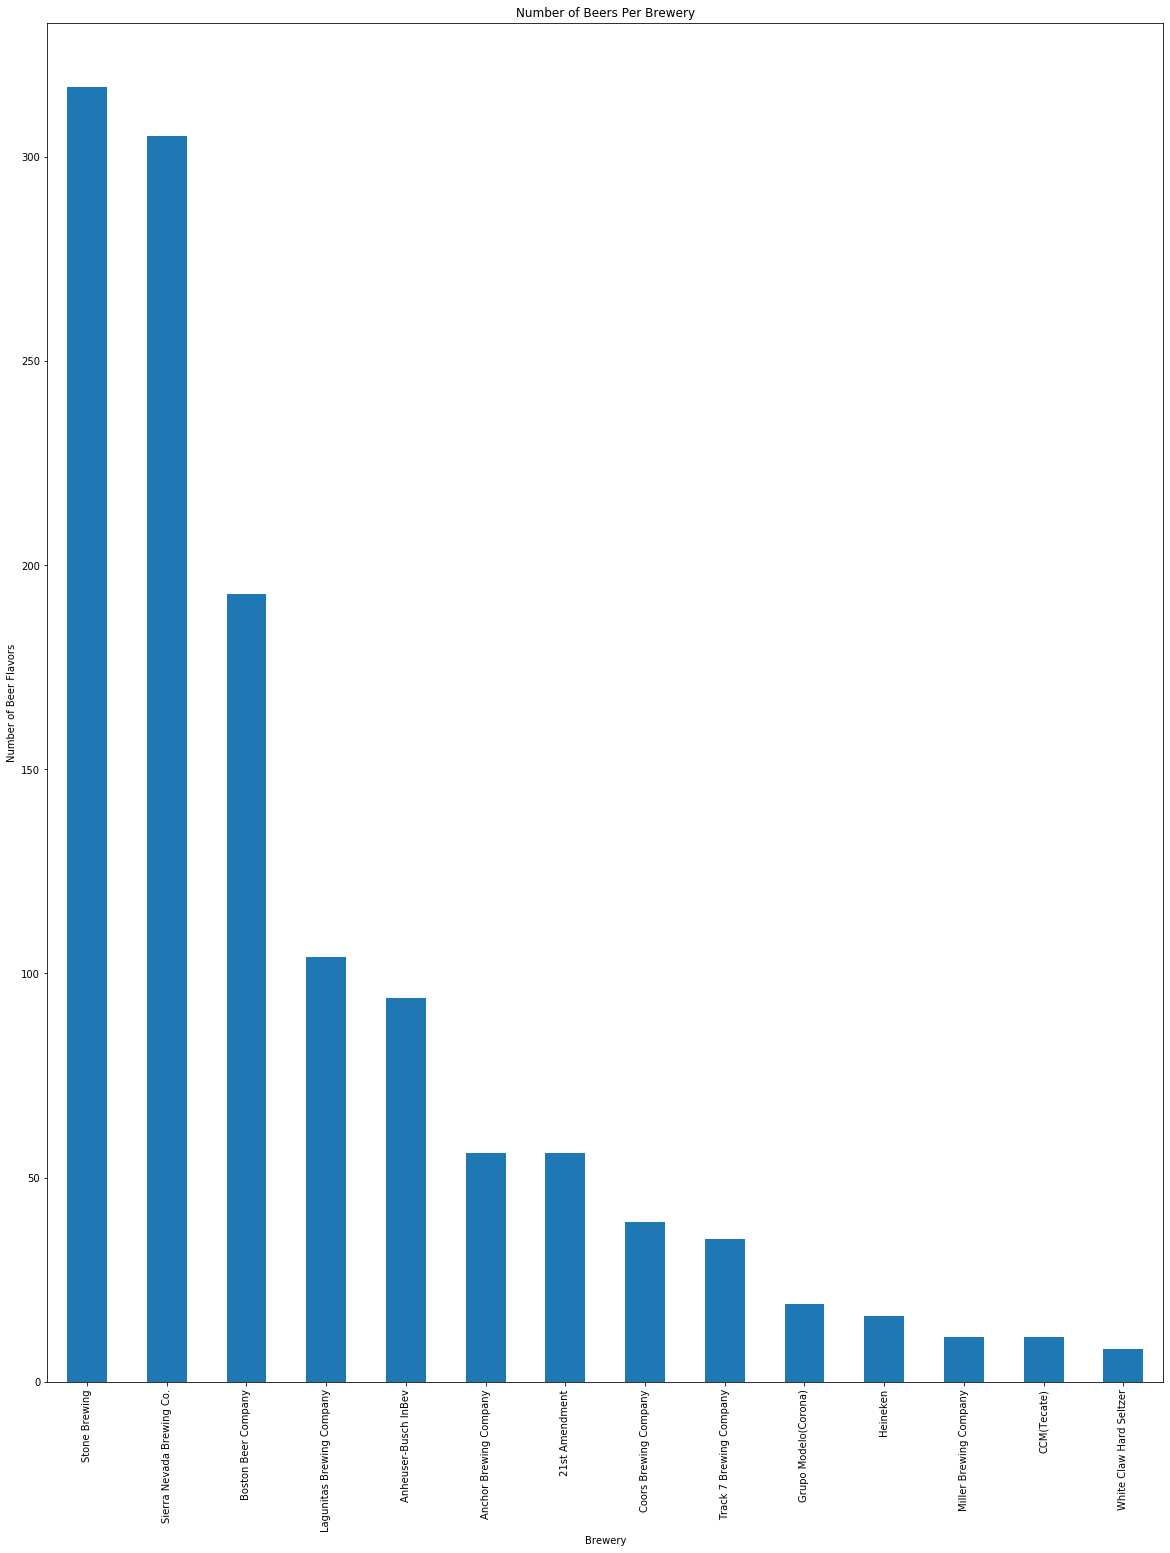

<Figure size 432x288 with 0 Axes>

In [5]:
data_points.plot(kind="bar", figsize=(20,25))

plt.title('Number of Beers Per Brewery')
plt.xlabel('Brewery')
plt.ylabel('Number of Beer Flavors')
plt.savefig('Images/beersperbrewery.png')
plt.show()
plt.tight_layout()


In [6]:
brewery_df = all_breweriesdf.groupby(['Brewery'])


abvMax_mean = brewery_df['abv'].mean()
ibuMax_mean = brewery_df['ibu'].mean()

In [7]:
summary_stats = pd.DataFrame({'AbvMax Mean': abvMax_mean, 'IbuMax Mean': ibuMax_mean})
summary_stats

AbvMax Mean  IbuMax Mean
Brewery                                            
21st Amendment                7.105556    51.750000
Anchor Brewing Company        6.555319    54.600000
Anheuser-Busch InBev          5.570330     9.000000
Boston Beer Company           6.605202    26.897196
CCM(Tecate)                   4.650000    10.000000
Coors Brewing Company         5.632222    16.750000
Grupo Modelo(Corona)          4.447368    18.500000
Heineken                      4.584615    14.833333
Lagunitas Brewing Company     7.643750    52.538163
Miller Brewing Company        4.687273    11.000000
Sierra Nevada Brewing Co.     7.318855    45.836957
Stone Brewing                 8.728457    70.389286
Track 7 Brewing Company       7.710606    61.937500
White Claw Hard Seltzer       4.837500     0.000000

## Bar Graph for Average ABV Values

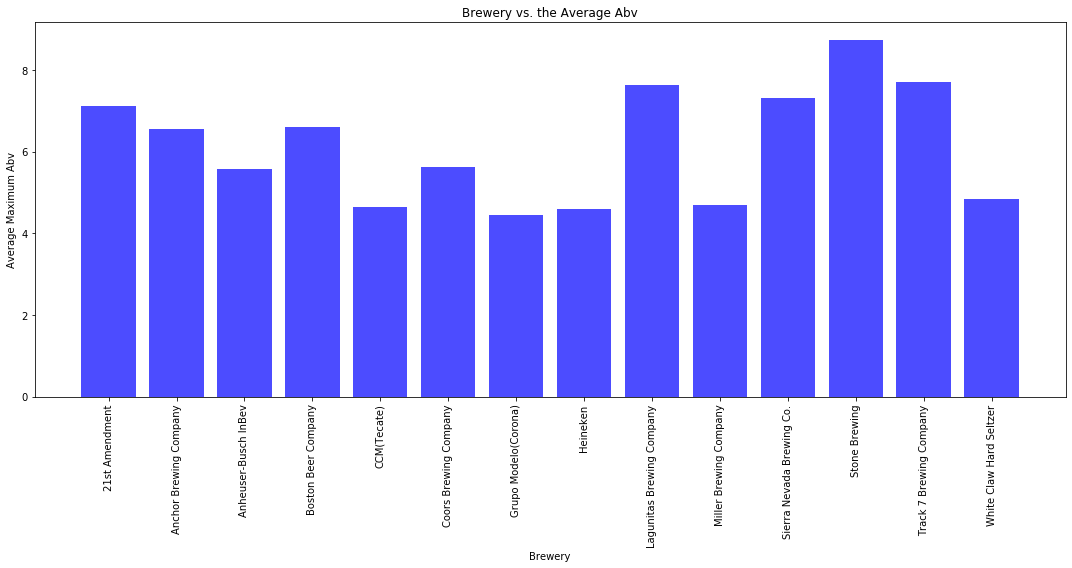

In [8]:
numofpoints=summary_stats["AbvMax Mean"]
x_axis = np.arange(len(numofpoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ["21st Amendment", "Anchor Brewing Company", "Anheuser-Busch InBev", "Boston Beer Company",
                           "CCM(Tecate)", "Coors Brewing Company", "Grupo Modelo(Corona)", "Heineken", "Lagunitas Brewing Company",
                           "Miller Brewing Company", "Sierra Nevada Brewing Co.", "Stone Brewing", "Track 7 Brewing Company", "White Claw Hard Seltzer"], rotation='vertical')
plt.title('Brewery vs. the Average Abv')
plt.xlabel('Brewery')
plt.ylabel('Average Maximum Abv')
plt.tight_layout()
plt.savefig('Images/BreweryvsAbv.png')
plt.show()


## Bar Graph for Average IBU Values

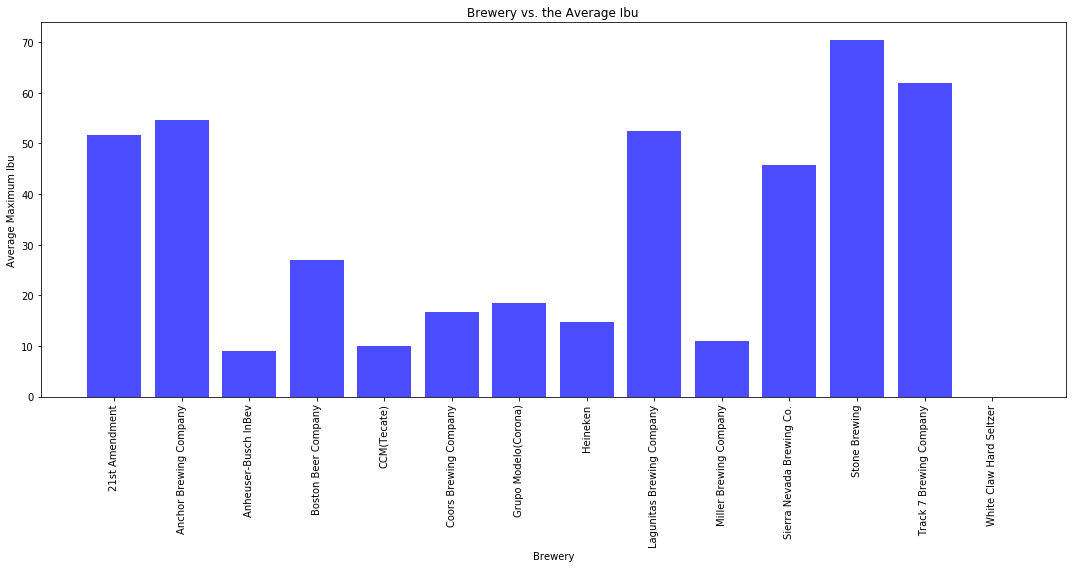

In [9]:
numofpoints=summary_stats["IbuMax Mean"]
x_axis = np.arange(len(numofpoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ["21st Amendment", "Anchor Brewing Company", "Anheuser-Busch InBev", "Boston Beer Company",
                           "CCM(Tecate)", "Coors Brewing Company", "Grupo Modelo(Corona)", "Heineken", "Lagunitas Brewing Company",
                           "Miller Brewing Company", "Sierra Nevada Brewing Co.", "Stone Brewing", "Track 7 Brewing Company", "White Claw Hard Seltzer"], rotation='vertical')
plt.title('Brewery vs. the Average Ibu')
plt.xlabel('Brewery')
plt.ylabel('Average Maximum Ibu')
plt.tight_layout()
plt.savefig('Images/breweryvsIbu.png')
plt.show()


## Scatter Plots
Correlation appears to be strong between IBU level and ABV level.
R value = 0.86...

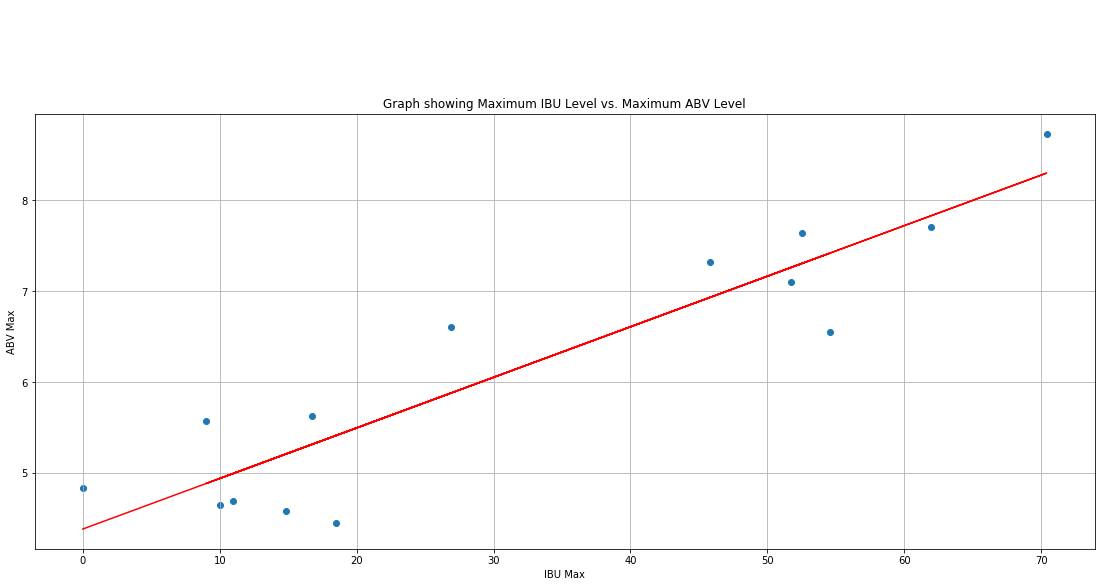

y =0.06x + 4.38
R2 is: 0.844868965568881


In [10]:
#Scatter Plots
x_values = summary_stats["IbuMax Mean"]
y_values = summary_stats["AbvMax Mean"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(19,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("IBU Max")
plt.ylabel("ABV Max")
plt.title("Graph showing Maximum IBU Level vs. Maximum ABV Level")
plt.grid()
plt.savefig('Images/Scatterplots.png')
plt.show()
print(line_eq)
print(f"R2 is: {rvalue**2}")


## Box Plot For Average ABV Values

In [11]:
# looking at top 4 data with Abv Means

collectn_1 = summary_stats['AbvMax Mean'][1]
collectn_2 = summary_stats['AbvMax Mean'][11]
collectn_3 = summary_stats['AbvMax Mean'][6]
collectn_4 = summary_stats['AbvMax Mean'][3]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
data_to_plot

[6.555319148936171, 8.72845659163987, 4.447368421052632, 6.605202312138723]

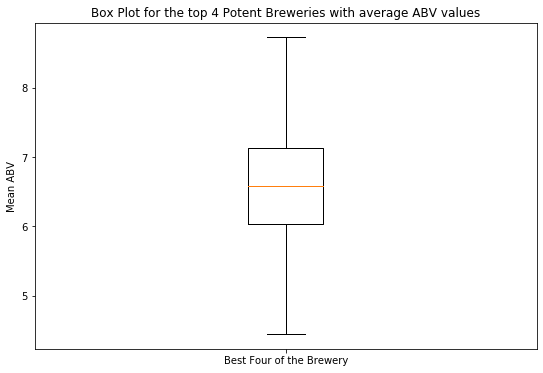

In [12]:
# Creating Box Plots
fig = plt.figure(2, figsize=(9,6))

ax = fig.add_subplot(111)


bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(['Best Four of the Brewery'])
ax.set_ylabel('Mean ABV')
ax.set_title('Box Plot for the top 4 Potent Breweries with average ABV values')
fig.savefig('Images/Abvboxplot.png')

## Box Plot for Average IBU Values

In [13]:
# looking at top 4 data with IBU Means

collectn_1 = summary_stats['IbuMax Mean'][11]
collectn_2 = summary_stats['IbuMax Mean'][1]
collectn_3 = summary_stats['IbuMax Mean'][12]
collectn_4 = summary_stats['IbuMax Mean'][8]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
data_to_plot

[70.3892857142857, 54.6, 61.9375, 52.53816326530612]

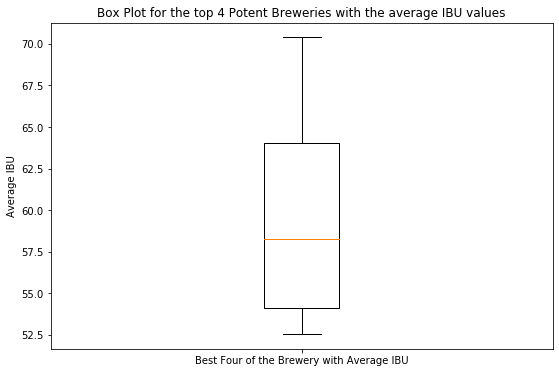

In [14]:
# Creating Box Plots
fig = plt.figure(2, figsize=(9,6))

ax = fig.add_subplot(111)


bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(['Best Four of the Brewery with Average IBU'])
ax.set_ylabel('Average IBU')
ax.set_title('Box Plot for the top 4 Potent Breweries with the average IBU values')
fig.savefig('Images/Ibuboxplot.png')

## Pie Chart for the IsOrganic Question

In [15]:
# CleanBeerData File
clean_beer = "beers/CleanBeerData.csv"
cleanbeer_df = pd.read_csv(clean_beer) 
cleanbeer_df.head()

id                       name                nameDisplay   abv  \
0  c4f2KE           'Murican Pilsner           'Murican Pilsner   5.5   
1  zTTWa2                11.5° PLATO                11.5° PLATO   4.5   
2  zfP2fK              12th Of Never              12th Of Never   5.5   
3  xwYSL2       15th Anniversary Ale       15th Anniversary Ale   NaN   
4  UJGpVS  16 So Fine Red Wheat Wine  16 So Fine Red Wheat Wine  11.0   

  isOrganic isRetired           createDate           updateDate glass.name  \
0         N         N  2013-08-19 11:58:12  2018-11-02 02:15:14    Pilsner   
1         N         N  2016-08-09 14:44:42  2018-11-02 02:15:14        NaN   
2         N         N  2016-08-03 23:25:54  2018-11-02 02:15:14        NaN   
3         N         N  2015-04-16 15:44:15  2018-11-02 02:15:14        NaN   
4         N         N  2013-02-24 16:31:05  2018-11-02 02:15:14        NaN   

          style.category.name  ... style.fgMax     style.createDate  \
0        North American Lager  ...       1.018  2012-03-21 20:06:46   
1  North American Origin Ales  ...         NaN  2015-04-07 17:07:27   
2  North American Origin Ales  ...       1.014  2012-03-21 20:06:45   
3         British Origin Ales  ...       1.016  2012-03-21 20:06:45   
4  North American Origin Ales  ...       1.032  2012-03-21 20:06:46   

      style.updateDate   ibu  available.name  year  style.ogMax  srm.name  \
0  2015-04-07 15:40:08   NaN             NaN   NaN          NaN       NaN   
1                  NaN  35.0             NaN   NaN          NaN       NaN   
2  2015-04-07 15:25:18  45.0      Year Round   NaN          NaN       NaN   
3  2015-04-07 15:19:20   NaN             NaN   NaN          NaN       NaN   
4  2015-04-07 15:27:17   NaN             NaN   NaN          NaN       NaN   

   servingTemperature  style.category.updateDate  
0                 NaN                        NaN  
1                 NaN                        NaN  
2                 NaN                        NaN  
3                 NaN                        NaN  
4                 NaN                        NaN  

[5 rows x 31 columns]

In [16]:
data_value = cleanbeer_df.groupby(["isOrganic"]).count()['name'].sort_values(ascending=False)
data_value

isOrganic
N    3521
Y      81
Name: name, dtype: int64

In [17]:
count = cleanbeer_df["isOrganic"].count()
count

3602

In [18]:
no_count = data_value['N']
yes_count = data_value['Y']

In [19]:
no_percentage = round((no_count / count) * 100, 2)
yes_percentage = round((yes_count / count) * 100, 2)

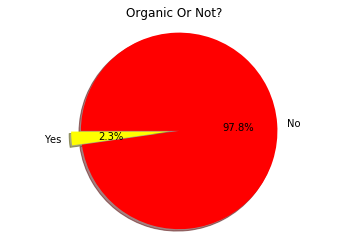

In [20]:
labels = ["Yes", "No"]
sizes = [yes_percentage, no_percentage]
colors = ["Yellow", "Red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Organic Or Not?")
plt.axis("equal")
plt.savefig("Images/OrganicOrNot.png")


## Top 10 Beer Style

In [22]:
breweries_df = all_breweriesdf.groupby(['style.shortName'])

abvMax_mean = breweries_df['abv'].mean()
ibuMax_mean = breweries_df['ibu'].mean()

summary_stylename = pd.DataFrame({'AbvMax Mean': abvMax_mean, 'IbuMax Mean': ibuMax_mean})
summary_stylename
summary_stylename.dropna(how='any')
summary_stylename.sort_values(["AbvMax Mean", "IbuMax Mean"], inplace=True, ascending=[False, False])

ten_best = summary_stylename.head(10)


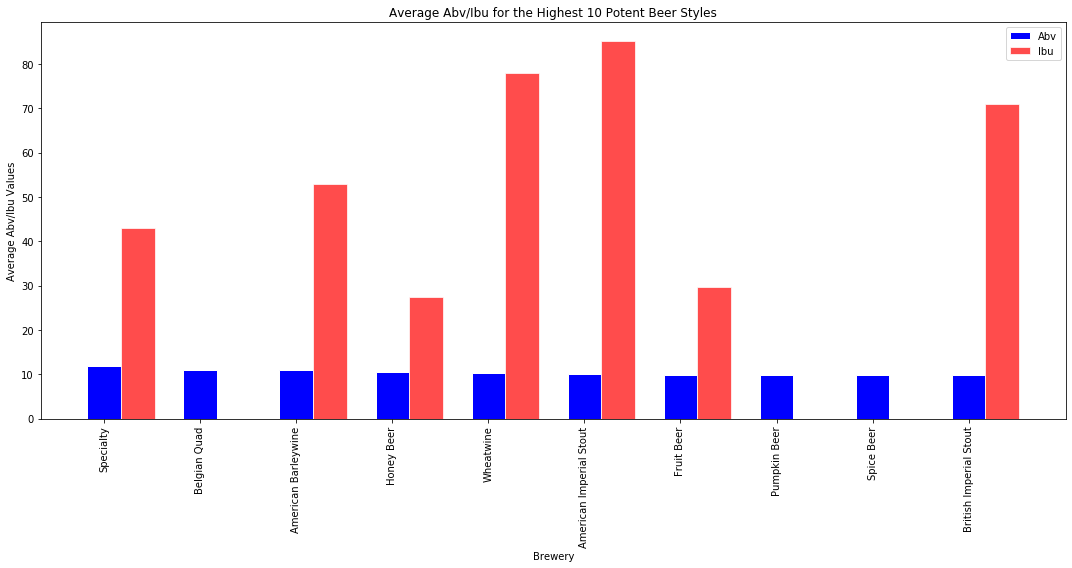

In [23]:
datapoints = ten_best["AbvMax Mean"]
datapoint2 = ten_best["IbuMax Mean"]
x_axis = np.arange(len(datapoints))
barWidth = 0.35
tick_locations = [value for value in x_axis]
tick_location2= [value + barWidth for value in x_axis]
plt.figure(figsize=(15,8))

plt.bar(tick_locations, datapoints, color='blue', width=barWidth, edgecolor='white', label='Abv')
plt.bar(tick_location2, datapoint2, alpha=0.7, color='red', width=barWidth, edgecolor='white', label='Ibu')
plt.xticks(tick_locations,['Specialty', 'Belgian Quad', 'American Barleywine', 'Honey Beer', 'Wheatwine', 'American Imperial Stout', 'Fruit Beer', 'Pumpkin Beer', 'Spice Beer', 'British Imperial Stout'], rotation='vertical')
plt.title('Average Abv/Ibu for the Highest 10 Potent Beer Styles')
plt.xlabel('Brewery')
plt.ylabel('Average Abv/Ibu Values')
plt.tight_layout()
plt.legend()
plt.savefig('Images/Top10BeerStyle.png')
plt.show()

